In [3]:
from handmade_fft import * # рукописный модуль из файла handmade_fft.py, 
                           # лежащего в той же папке, что и блокнот

# пакеты, подключающие красивую графику
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
np.warnings.filterwarnings('ignore', category=DeprecationWarning)
set_matplotlib_formats('svg')
plt.rcParams["axes.labelsize"] = 12.
plt.rcParams["xtick.labelsize"] = 8.
plt.rcParams["ytick.labelsize"] = 8.
plt.rcParams["legend.fontsize"] = 8.
plt.rcParams["figure.figsize"] = [8., 5.]

## Быстрое преобразование Фурье.

### Условие:

1.	Написать класс быстрого прямого и обратного преобразования Фурье комплексных значений с возможной длиной преобразования кратной 2, 3, 5 (длина выборки $N=2^{p_1}\cdot3^{p_2}\cdot5^{p_3}$, где $p_{1,2,3}$ - натуральные числа).
2.	Запустить для случайных комплексных входных данных сначала прямое, а потом обратное преобразование Фурье.
3.	Сравнить ошибку между входными и выходными данными.

### Решение:

Чтобы убедиться в том, что написанный класс действительно работает, сравним результат работы функции fft с реализациями из пакета numpy на примере выборки из 30 отсчетов. Для этого вычислим среднее значение и СКО модуля разности спектров, вычисленных с помощью метода numpy.fft.fft и FFT.fft.

In [4]:
N_sample = 30 # длина тестовой выборки
sample_test = np.random.uniform(-1,1,N_sample)+1j*np.random.uniform(-1,1,N_sample) # сл.компл. числа из [-1;1]*[-1;1]

In [12]:
fft_ref = np.fft.fft(sample_test) # эталонный спектр из numpy
fft_test = FFT.fft(sample_test) # сравниваемое решение
error_test_1 = abs(fft_ref-fft_test) # массив модулей ошибок

print('Среднее значение модуля ошибки, 10^{-12}:', round(np.mean(error_test_1)*1e12,4))
print('Значение СКО ошибки, 10^{-12}:', round(np.std(error_test_1)*1e12,4))

Среднее значение модуля ошибки, 10^{-12}: 0.0022
Значение СКО ошибки, 10^{-12}: 0.0015


Среднее значение и величина СКО составляют порядка $10^{-15}$, что пренебежимо мало по сравнению со значениями из спектра. Проверим корректность работы функции FFT.ifft: двойное преобразование Фурье должно переводить выборку саму в себя. 

In [14]:
sample_test_double_ft = FFT.ifft(FFT.fft(sample_test)) # сравниваемое решение
error_test_2 = abs(sample_test_double_ft - sample_test) # массив модулей ошибок

print('Среднее значение модуля ошибки, 10^{-12}:', round(np.mean(error_test_2)*1e12,4))
print('Значение СКО ошибки, 10^{-12}:', round(np.std(error_test_2)*1e12,4))

Среднее значение модуля ошибки, 10^{-12}: 0.0004
Значение СКО ошибки, 10^{-12}: 0.0002


Теперь оценим быстродействие алгоритма. Для этого сравним его с написанным FFT.dft (медленное преобразование Фурье). При оценке воспользуемся функциями sample_235 и time_tester. Они написаны вне основного класса, потому что не имеют прямого отношения к решению задачи.

In [15]:
help(sample_235)

Help on function sample_235 in module handmade_fft:

sample_235(N)
    Функция, возвращающая выборку длины 2^((N-1)*3) вида 2^p_1*3^p_2*5^p_3;
    На вход: целое число N - максимальная степень в формуле;  
    На выходе: sample - массив целых значений, рассчитанных по формуле 2^p_1*3^p_2*5^p_3,
    где p_n пробегают все значения от 0 до N-1



In [16]:
help(time_tester)

Help on function time_tester in module handmade_fft:

time_tester(method, N_list)
    Функция, строящая зависимость времени расчета ДПФ от размера выборки;
    На вход: method - алгоритм выполнения ДПФ;
             N_list - целочисленный список всех значений N;
    На выходе: t_list - вещественный массив времен расчета для разных N



In [17]:
N_dft = np.arange(1,3001,50) # разные длины выборки для медленного алгоритма
t_dft = time_tester(FFT.dft,N_dft) # соответствующие времена

N_fft = sample_235(4) # разные длины выборки для быстрого алгоритма
t_fft = time_tester(FFT.fft,N_fft) # соответствующие времена

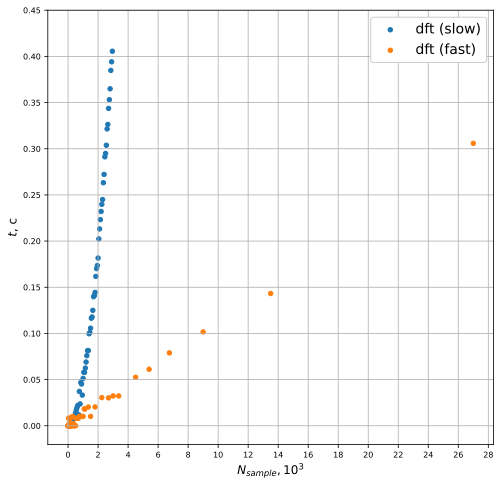

In [18]:
fig1, ax = plt.subplots(figsize=(8,8))

ax.scatter(N_dft*1e-3, t_dft, alpha=1, s=20, label=r'dft (slow)')
ax.scatter(N_fft*1e-3, t_fft, alpha=1, s=20, label=r'dft (fast)')

ax.set_xlabel(r"$N_{sample}, 10^{3}$")
ax.set_ylabel(r"$t$, с")

plt.legend(loc=0, prop={'size': 14}, framealpha=1)
plt.xticks(np.arange(0,30,2))
plt.yticks(np.arange(0,0.5,0.05))
ax.grid(True)

plt.show()